<a href="https://colab.research.google.com/github/19PA1A0495/cv-ip-31-/blob/main/cv_CNN3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
img_width, img_height = 300, 300

In [ ]:
train_data_dir = '/content/drive/MyDrive/CVDataset/casting_data/casting_data/train'
validation_data_dir = '/content/drive/MyDrive/CVDataset/casting_data/casting_data/test'
nb_train_samples =6647
nb_validation_samples = 715
epochs = 10
batch_size = 16

In [ ]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (2, 2), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(32, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Conv2D(64, (2, 2)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
  
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1. / 255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1. / 255)
  
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(img_width, img_height),batch_size=batch_size,class_mode='binary')
  
validation_generator = test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width, img_height),batch_size=batch_size,class_mode='binary')
  

Found 6647 images belonging to 2 classes.
Found 715 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(train_generator,steps_per_epoch=25,epochs=epochs,validation_data=validation_generator,validation_steps=2000)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
25/25 [==============================] - 419s 16s/step - loss: 2.6658 - accuracy: 0.5332 - val_loss: 0.6671 - val_accuracy: 0.6336
Epoch 2/10
25/25 [==============================] - 127s 5s/step - loss: 0.6969 - accuracy: 0.4717
Epoch 3/10
25/25 [==============================] - 121s 5s/step - loss: 0.7264 - accuracy: 0.5478
Epoch 4/10
25/25 [==============================] - 120s 5s/step - loss: 0.6870 - accuracy: 0.5994
Epoch 5/10
25/25 [==============================] - 114s 5s/step - loss: 0.6654 - accuracy: 0.5938
Epoch 6/10
25/25 [==============================] - 106s 4s/step - loss: 0.6806 - accuracy: 0.6173
Epoch 7/10
25/25 [==============================] - 95s 4s/step - loss: 0.6686 - accuracy: 0.6028
Epoch 8/10
25/25 [==============================] - 91s 4s/step - loss: 0.6884 - accuracy: 0.5776
Epoch 9/10
25/25 [==============================] - 82s 3s/step - loss: 0.6605 - accuracy: 0.5997
Epoch 10/10
25/25 [==============================] - 84s 3s/step - lo

Text(0.5, 1.0, 'Accuracy Curves')

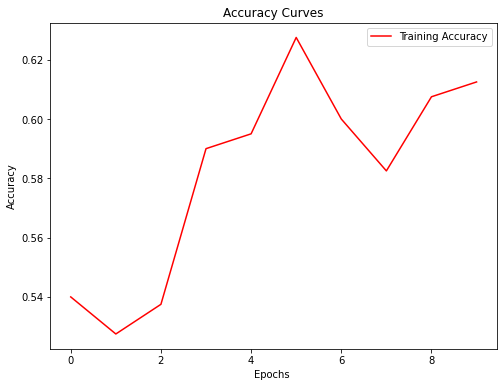

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r')
plt.legend(['Training Accuracy'])
plt.xlabel('Epochs ')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

In [ ]:
test_score = model.evaluate_generator(validation_generator, 10)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 71.25%
[INFO] Loss:  0.5957708954811096


In [ ]:
target_names = []
for key in train_generator.class_indices:
    target_names.append(key)

In [ ]:
Y_pred = model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
print('Classification Report')
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

   def_front       0.63      1.00      0.78       453
    ok_front       0.00      0.00      0.00       262

    accuracy                           0.63       715
   macro avg       0.32      0.50      0.39       715
weighted avg       0.40      0.63      0.49       715



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
